We have packaged `extractTransform` from Vega Lite up as a mime renderer:

In [2]:
from IPython.display import display

In [5]:
SPEC ={
 "data": {
  "url": "https://vega.github.io/vega-lite/data/seattle-weather.csv"
 },
 "layer": [
  {
   "mark": "bar",
   "encoding": {
    "x": {
     "timeUnit": "month",
     "field": "date",
     "type": "ordinal"
    },
    "y": {
     "aggregate": "mean",
     "field": "precipitation",
     "type": "quantitative",
     "axis": {
      "grid": False
     }
    }
   }
  },
  {
   "mark": "line",
   "encoding": {
    "x": {
     "timeUnit": "month",
     "field": "date",
     "type": "ordinal"
    },
    "y": {
     "aggregate": "mean",
     "field": "temp_max",
     "type": "quantitative",
     "axis": {
      "grid": False
     },
     "scale": {
      "zero": False
     }
    },
    "color": {
     "value": "firebrick"
    }
   }
  }
 ],
 "resolve": {
  "scale": {
   "y": "independent"
  }
 }
}

Let's look at this chart:

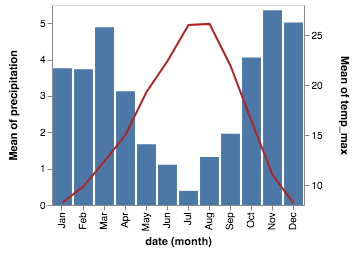

In [6]:
display({"application/vnd.vegalite.v2+json": SPEC}, raw=True)

Now let's transform the spec to return a new one with the transformed extracted:

In [7]:
display({"application/vnd.omnisci.extract-vega-lite+json": SPEC}, raw=True)